In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Рассмотрим Бета-распределение ([wiki](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5))
 с параметрами $\alpha$ = 0.5 и $\beta$ = 0.5



In [2]:
a = 0.5
b = 0.5
beta = sts.beta(a, b)

Построим график функции плотности распределения

Text(0.5, 0, 'x')

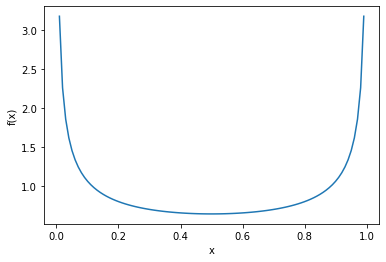

In [3]:
X = np.linspace(0, 1, 100)
Y_theoretical = beta.pdf(X)
plt.plot(X, Y_theoretical)
plt.ylabel('f(x)')
plt.xlabel('x')

Как вы можете заметить, данный график совершенно не похож на график плотности нормального распределения.
Посмотрим, что же из этого получится :D

Сгенерируем выборку из 1000 элементов и сравним эмпирическую плотность распределения с теретической
с помощью гистограммы.

Text(0.5, 0, 'x')

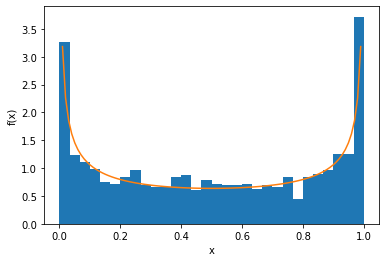

In [4]:
sample = beta.rvs(1000)
plt.hist(sample, bins=30, density=True)
plt.plot(X, Y_theoretical)
plt.ylabel('f(x)')
plt.xlabel('x')

Выборка достаточно большая, поэтому эмпирическая плотность распределения
не сильно отличается от теоретической.

Оценим распределение выборочного среднего Бета-распределения.
Для этого опишем функции, с помощью которых будем генерировать выборки
и собирать выборку из выборочных средних. (да да, слово выборка будет сниться вам в кошмарах)

In [5]:
# Вычисляет выборочное среднее выборки
def mean(sample):
    return sum(sample) / float(len(sample))


# Генерирует выборку из 1000 выборочных средних выброк размера one_sample_size
def generate_sample_mean(one_sample_size):
    sample_mean = np.array([])
    for i in range(1000):
        sample = beta.rvs(size=one_sample_size)
        sample_mean = np.append(sample_mean, mean(sample))
    return sample_mean


# Строит гистограмму выборочных средних, полученных из выборок размера sample_size
def plot_mean_sample_hist(sample_size):
    sample_mean_size = generate_sample_mean(sample_size)
    plt.hist(sample_mean_size, bins=15, density=True)
    plt.ylabel('f(x)')
    plt.xlabel('x')


Теперь построим гистограммы эмпирической плотности распределения выборочного среднего,
вычисленного на основе выборок разного размера.

Выборка размера 2:

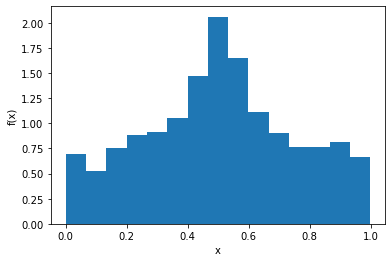

In [6]:
plot_mean_sample_hist(2)

Выборка размера 5:

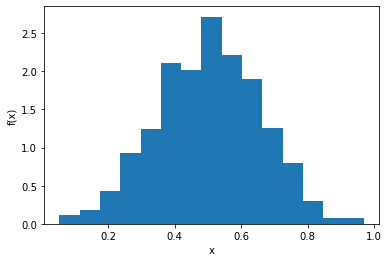

In [7]:
plot_mean_sample_hist(5)

Выборка размера 30:

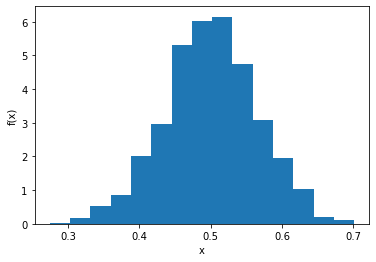

In [8]:
plot_mean_sample_hist(30)

Далее выполним проверку - вычислим теоретические параметры нормального распределения нашего выборочного среднего.

Для этого сначала вычислим математическое ожидание и дисперсию нашего исходного Бета-распределения.

$$E[X] = \dfrac{\alpha}{\alpha + \beta} = \dfrac{0.5}{0.5 + 0.5} = 0.5$$

$$D[X] = \dfrac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} = \dfrac{0.5 * 0.5}{(0.5 + 0.5)^2 (0.5 + 0.5 + 1)} = 0.125$$

In [9]:
expected_value_beta = a / (a + b)
dispersion_beta = a * b / ((a + b) * (a + b) * (a + b + 1))
print("Мат. ожидание бета-распределения: " + str(expected_value_beta))
print("Дисперсия бета-распределения: " + str(dispersion_beta))

Мат. ожидание бета-распределения: 0.5
Дисперсия бета-распределения: 0.125


Используя информацию о теоретических параметрах бета-распределения, найдём теоретические параметры
нормального распределения, которым приближается распределение выборочных средних.
И сопоставим гистограмму функции плотности эмпирического распределения c графиком теоретической плотности распределения выборочных средних.

In [10]:
# Строит гистограмму функции плотности импирического распределения
# и график теоретической плотности распределения выборочных средних
# на основе выборок размера sample_size
def plot_mean_sample_hist_and_pdf(sample_size):
    standard_deviation = sqrt(dispersion_beta / float(sample_size))
    mean_sample_distribution = sts.norm(expected_value_beta, standard_deviation)
    sample_mean = generate_sample_mean(sample_size)
    X = np.linspace(0, 1, 100)
    Y = mean_sample_distribution.pdf(X)

    plt.hist(sample_mean, bins=15, density=True)
    plt.plot(X, Y)
    plt.ylabel('f(x)')
    plt.xlabel('x')


Рассмотрим выборки размера 2:

$$E[\bar{X}] = E[X] = 0.5$$

$$D[\bar{X}] = \dfrac{E[X]}{n} = \dfrac{0.125}{2} = 0.0625$$

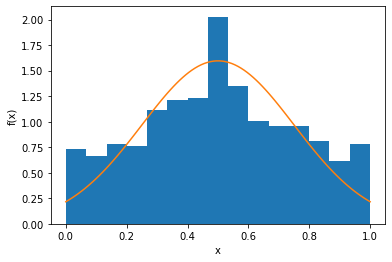

In [11]:
plot_mean_sample_hist_and_pdf(2)

Рассмотрим выборки размера 5:

$$E[\bar{X}] = E[X] = 0.5$$

$$D[\bar{X}] = \dfrac{E[X]}{n} = \dfrac{0.125}{5} = 0.025$$

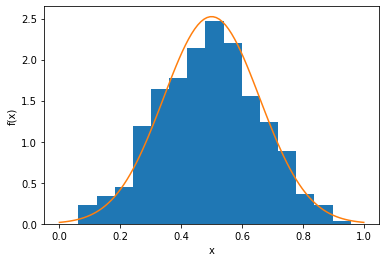

In [12]:
plot_mean_sample_hist_and_pdf(5)

Рассмотрим выборки размера 30:

$$E[\bar{X}] = E[X] = 0.5$$

$$D[\bar{X}] = \dfrac{E[X]}{n} = \dfrac{0.125}{30} \thickapprox 0.00417$$

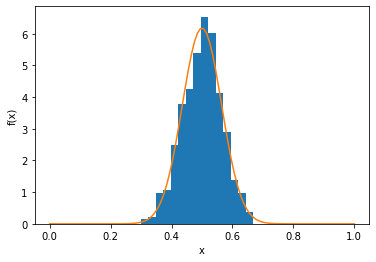

In [13]:
plot_mean_sample_hist_and_pdf(30)

В результате, мы убедились, что выборочное среднее нашего Бета-распределения, которое совсем не похоже на нормальное, всё равно достаточно хорошо
приближается нормальным распределением. При размере выборки 5+ элементов эмпирическая функция плотности распределения
очень близка к теоретической. Следовательно, Центральная Предельная Теорема верна в данном случае.
